<h3>Movie Recommendation</h3>

movie recommendation merupakan model rekomendasi movie yang saya buat dengan menggunakan correlasi antar movie yang di liat oleh user, data yang saya gunakan berasal dari buku Data Mining dan Big Data Analytics berupa data movie dan data ratings.


In [1]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_movies = pd.read_csv('movies.csv').drop(['genres'], axis=1)
df_ratings = pd.read_csv('ratings.csv').drop(['timestamp'], axis=1)

df = df_movies.merge(df_ratings, on='movieId')
df.shape

(100004, 4)

In [3]:
df.head()

,movieId,title,userId,rating
0,1,Toy Story (1995),7,3.0
1,1,Toy Story (1995),9,4.0
2,1,Toy Story (1995),13,5.0
3,1,Toy Story (1995),15,2.0
4,1,Toy Story (1995),19,3.0


In [4]:
df.describe()

,movieId,userId,rating
count,100004.000000,100004.000000,100004.000000
mean,12548.664363,347.011310,3.543608
std,26369.198969,195.163838,1.058064
min,1.000000,1.000000,0.500000
25%,1028.000000,182.000000,3.000000
50%,2406.500000,367.000000,4.000000
75%,5418.000000,520.000000,4.000000
max,163949.000000,671.000000,5.000000


In [5]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Burn Up! (1991)                                     5.0
Absolute Giganten (1999)                            5.0
Gentlemen of Fortune (Dzhentlmeny udachi) (1972)    5.0
Erik the Viking (1989)                              5.0
Reality (2014)                                      5.0
Name: rating, dtype: float64

In [6]:
# melihat popularitas film dari jumlah yang memberikan rating
popularity = df.groupby('title')['rating'].count().sort_values(ascending=False)
popularity.head(10)

title
Forrest Gump (1994)                          341
Pulp Fiction (1994)                          324
Shawshank Redemption, The (1994)             311
Silence of the Lambs, The (1991)             304
Star Wars: Episode IV - A New Hope (1977)    291
Jurassic Park (1993)                         274
Matrix, The (1999)                           259
Toy Story (1995)                             247
Schindler's List (1993)                      244
Terminator 2: Judgment Day (1991)            237
Name: rating, dtype: int64

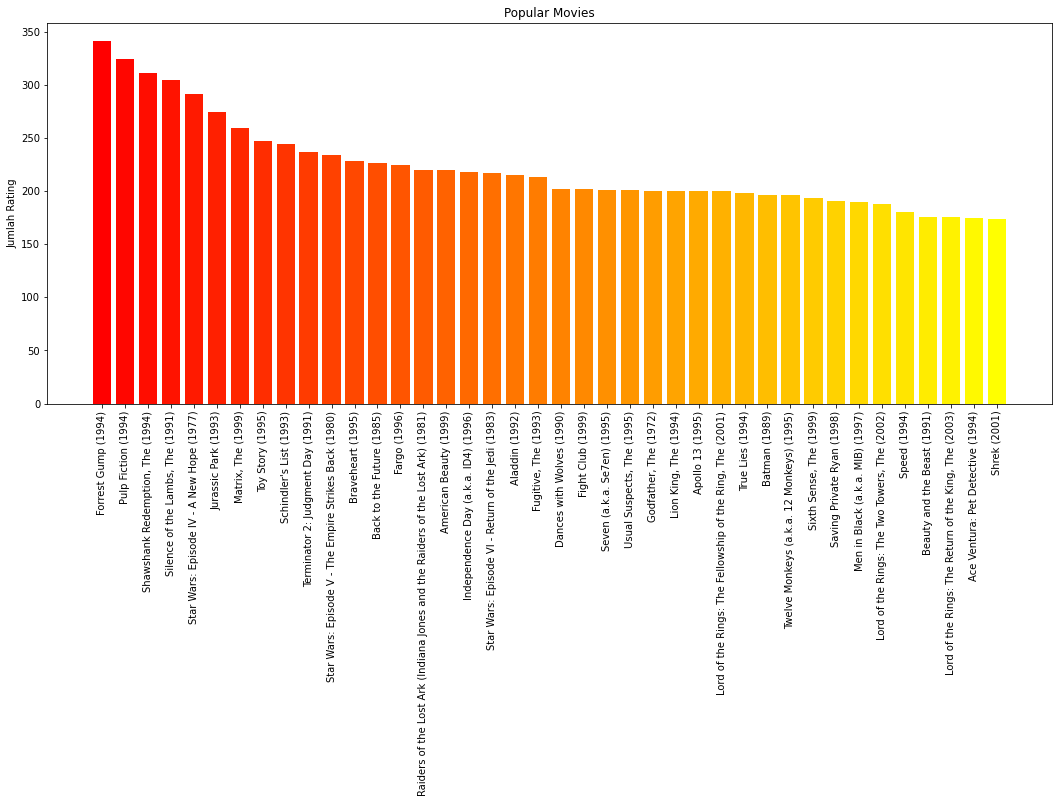

In [7]:
df_pop = df_movies.merge(popularity, on='title')

pop = df_pop.sort_values('rating', ascending=False)

plt.figure(figsize=(18,7))

plt.bar(pop['title'].head(40),pop['rating'].head(40), align='center',
        color=plt.cm.autumn(np.linspace(0, 1, 40)))
plt.ylabel("Jumlah Rating")

plt.xticks(rotation = 90 )
plt.title("Popular Movies")
plt.show()

In [8]:
movie = df.pivot_table(index = 'userId', columns = 'title', values = 'rating').fillna(0)
movie.head(20)

title,"""Great Performances"" Cats (1998)",$9.99 (2008),'Hellboy': The Seeds of Creation (2004),'Neath the Arizona Skies (1934),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),...,Zulu (1964),Zulu (2013),[REC] (2007),eXistenZ (1999),loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931),İtirazım Var (2014)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
similarity = movie.corr(method='pearson')
similarity.head(20)

title,"""Great Performances"" Cats (1998)",$9.99 (2008),'Hellboy': The Seeds of Creation (2004),'Neath the Arizona Skies (1934),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),...,Zulu (1964),Zulu (2013),[REC] (2007),eXistenZ (1999),loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931),İtirazım Var (2014)
title,,,,,,,,,,,,,,,,,,,,,
"""Great Performances"" Cats (1998)",1.000000,-0.002894,-0.001718,0.162966,0.018512,-0.001718,0.011006,-0.007311,-0.002980,-0.008271,...,-0.002431,-0.001718,-0.002929,-0.008014,-0.001718,-0.007546,-0.001718,-0.009406,-0.001718,-0.001718
$9.99 (2008),-0.002894,1.000000,-0.002514,-0.002514,-0.002807,-0.002514,-0.004518,0.070014,-0.004360,0.144961,...,-0.003558,-0.002514,-0.004286,-0.011726,-0.002514,0.003087,-0.002514,0.045869,-0.002514,-0.002514
'Hellboy': The Seeds of Creation (2004),-0.001718,-0.002514,1.000000,-0.001493,-0.001666,1.000000,-0.002682,0.214088,-0.002589,-0.010031,...,-0.002112,-0.001493,-0.002545,-0.006962,-0.001493,-0.006556,-0.001493,-0.008172,-0.001493,-0.001493
'Neath the Arizona Skies (1934),0.162966,-0.002514,-0.001493,1.000000,0.122576,-0.001493,0.083023,-0.006351,-0.002589,0.009882,...,-0.002112,-0.001493,-0.002545,-0.006962,-0.001493,-0.006556,-0.001493,-0.008172,-0.001493,-0.001493
'Round Midnight (1986),0.018512,-0.002807,-0.001666,0.122576,1.000000,-0.001666,0.007638,0.138760,-0.002891,0.129609,...,-0.002358,-0.001666,-0.002841,0.115866,-0.001666,-0.007320,-0.001666,-0.009124,-0.001666,-0.001666
'Salem's Lot (2004),-0.001718,-0.002514,1.000000,-0.001493,-0.001666,1.000000,-0.002682,0.214088,-0.002589,-0.010031,...,-0.002112,-0.001493,-0.002545,-0.006962,-0.001493,-0.006556,-0.001493,-0.008172,-0.001493,-0.001493
'Til There Was You (1997),0.011006,-0.004518,-0.002682,0.083023,0.007638,-0.002682,1.000000,0.101774,0.292683,-0.016322,...,-0.003796,-0.002682,-0.004573,0.147406,-0.002682,-0.011781,-0.002682,0.068941,-0.002682,-0.002682
"'burbs, The (1989)",-0.007311,0.070014,0.214088,-0.006351,0.138760,0.214088,0.101774,1.000000,0.201418,0.049358,...,-0.008989,-0.006351,-0.010829,0.057206,-0.006351,0.099502,-0.006351,0.308778,-0.006351,-0.006351
'night Mother (1986),-0.002980,-0.004360,-0.002589,-0.002589,-0.002891,-0.002589,0.292683,0.201418,1.000000,-0.017399,...,-0.003664,-0.002589,-0.004414,0.168006,-0.002589,-0.011372,-0.002589,0.205561,-0.002589,-0.002589


In [10]:
from fuzzywuzzy import process

c:\users\owi\appdata\local\programs\python\python37\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [11]:
movie_name = str(input('tuliskan judul movie yang ditonton :'))
movie_input = process.extractOne(movie_name, df['title'])

tuliskan judul movie yang ditonton :2 Fast 2 Furious (Fast and the Furious 2, The) (2003)


In [16]:
recommender = movie[movie_input[0]]
similar = movie.corrwith(recommender)
corr = pd.DataFrame(similar, columns=['Correlation'])
corr.dropna(inplace=True)

In [17]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
ratings['num of ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())

corr = corr.join(ratings['num of ratings'])

correlation = corr[corr['num of ratings']>10].sort_values('Correlation', ascending=False)
correlation.head(40)

,Correlation,num of ratings
title,,
"2 Fast 2 Furious (Fast and the Furious 2, The) (2003)",1.000000,12
"Transporter, The (2002)",0.519197,17
28 Weeks Later (2007),0.394398,14
Brick (2005),0.340532,14
50 First Dates (2004),0.339244,29
Starsky & Hutch (2004),0.334535,17
Identity (2003),0.331887,23
Anger Management (2003),0.328377,23
Superman Returns (2006),0.321127,13


In [18]:
df_corr = df_movies.merge(correlation, on='title')
df_coco = df_corr.sort_values('Correlation', ascending=False)
df_coco.head(40)

,movieId,title,Correlation,num of ratings
1636,6383,"2 Fast 2 Furious (Fast and the Furious 2, The)...",1.000000,12
1582,5574,"Transporter, The (2002)",0.519197,17
1874,53000,28 Weeks Later (2007),0.394398,14
1831,44761,Brick (2005),0.340532,14
1692,7293,50 First Dates (2004),0.339244,29
1696,7325,Starsky & Hutch (2004),0.334535,17
1627,6323,Identity (2003),0.331887,23
1625,6287,Anger Management (2003),0.328377,23
1841,46530,Superman Returns (2006),0.321127,13
1553,5219,Resident Evil (2002),0.319143,22


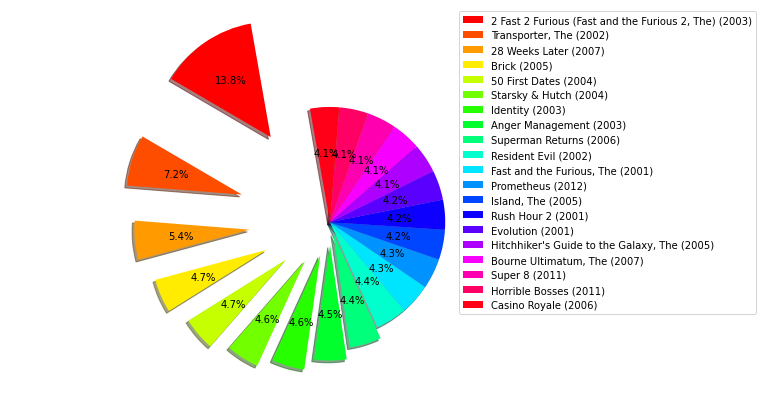

In [19]:
# visualisasi recommender sistem
colors = plt.cm.hsv(np.linspace(0, 1, 20))
explode = (0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)

plt.figure(figsize=(10,7))
plt.pie(df_coco['Correlation'].head(20), explode=explode, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=100)
plt.legend(df_coco['title'].head(20), loc="best",bbox_to_anchor=(0.8, 1))

plt.axis('equal')
plt.show()

In [20]:
movie_name = str(input('tuliskan judul movie yang ditonton :'))
movie_input = process.extractOne(movie_name, df['title'])

tuliskan judul movie yang ditonton :Cabin in the Woods


In [21]:
recommender = movie[movie_input[0]]
similar = movie.corrwith(recommender)
corr = pd.DataFrame(similar, columns=['Correlation'])
corr.dropna(inplace=True)

In [22]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
ratings['num of ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())

corr = corr.join(ratings['num of ratings'])

correlation = corr[corr['num of ratings']>10].sort_values('Correlation', ascending=False)
correlation.head(40)

,Correlation,num of ratings
title,,
"Cabin in the Woods, The (2012)",1.000000,13
Moon (2009),0.548797,28
Primer (2004),0.542866,12
Prometheus (2012),0.536738,16
Sunshine (2007),0.536282,11
Zombieland (2009),0.518227,37
Looper (2012),0.518165,20
Pacific Rim (2013),0.512461,16
Watchmen (2009),0.496725,26


In [23]:
df_corr = df_movies.merge(correlation, on='title')
df_coco = df_corr.sort_values('Correlation', ascending=False)
df_coco.head(40)

,movieId,title,Correlation,num of ratings
2021,93840,"Cabin in the Woods, The (2012)",1.000000,13
1950,68237,Moon (2009),0.548797,28
1744,8914,Primer (2004),0.542866,12
2023,94864,Prometheus (2012),0.536738,16
1869,52328,Sunshine (2007),0.536282,11
1963,71535,Zombieland (2009),0.518227,37
2028,96610,Looper (2012),0.518165,20
2043,103228,Pacific Rim (2013),0.512461,16
1924,60684,Watchmen (2009),0.496725,26
1974,76251,Kick-Ass (2010),0.484030,30


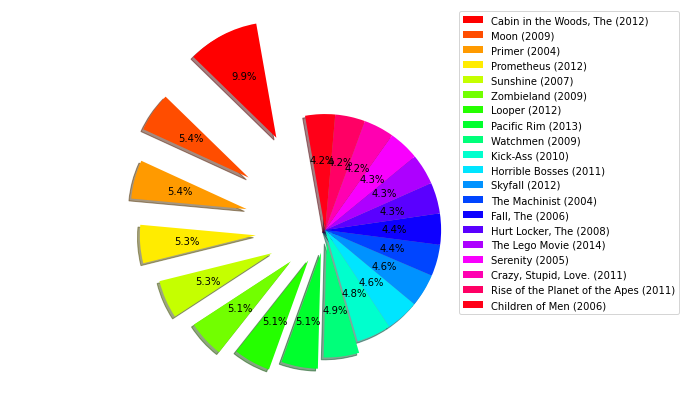

In [24]:
# visualisasi recommender sistem
colors = plt.cm.hsv(np.linspace(0, 1, 20))
explode = (0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)

plt.figure(figsize=(10,7))
plt.pie(df_coco['Correlation'].head(20), explode=explode, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=100)
plt.legend(df_coco['title'].head(20), loc="best",bbox_to_anchor=(0.8, 1))

plt.axis('equal')
plt.show()